In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/wumg/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf')



In [2]:
train_filename = "data.csv"

In [3]:
idKey = "id"
diagnosisKey = "diagnosis"
radiusMeanKey = "radius_mean"
textureMeanKey = "texture_mean"
perimeterMeanKey = "perimeter_mean"
areaMeanKey = "area_mean"
smoothnessMeanKey = "smoothness_mean"
compactnessMeanKey = "compactness_mean"
concavityMeanKey = "concavity_mean"
concavePointsMeanKey = "concave points_mean"
symmetryMeanKey = "symmetry_mean"
fractalDimensionMean = "fractal_dimension_mean"
radiusSeKey = "radius_se"
textureSeKey = "texture_se"
perimeterSeKey = "perimeter_se"
areaSeKey = "area_se"
smoothnessSeKey = "smoothness_se"
compactnessSeKey = "compactness_se"
concavitySeKey = "concavity_se"
concavePointsSeKey = "concave points_se"
symmetrySeKey = "symmetry_se"
fractalDimensionSeKey = "fractal_dimension_se"
radiusWorstKey = "radius_worst"
textureWorstKey = "texture_worst"
perimeterWorstKey = "perimeter_worst"
areaWorstKey = "area_worst"
smoothnessWorstKey = "smoothness_worst"
compactnessWorstKey = "compactness_worst"
concavityWorstKey = "concavity_worst"
concavePointsWorstKey = "concave points_worst"
symmetryWorstKey = "symmetry_worst"
fractalDimensionWorstKey = "fractal_dimension_worst"

In [4]:
train_columns = [idKey, diagnosisKey, radiusMeanKey, textureMeanKey, perimeterMeanKey, areaMeanKey, smoothnessMeanKey, compactnessMeanKey, concavityMeanKey, concavePointsMeanKey, symmetryMeanKey, fractalDimensionMean, radiusSeKey, textureSeKey, perimeterSeKey, areaSeKey, smoothnessSeKey, compactnessSeKey, concavitySeKey, concavePointsSeKey, symmetrySeKey, fractalDimensionSeKey, radiusWorstKey, textureWorstKey, perimeterWorstKey, areaWorstKey, smoothnessWorstKey, compactnessWorstKey, concavityWorstKey, concavePointsWorstKey, symmetryWorstKey, fractalDimensionWorstKey]

In [5]:
def get_train_data():
    df = pd.read_csv(train_filename, names= train_columns, delimiter=',', skiprows=1)
    return df


In [6]:
train_data = get_train_data()

In [7]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
train_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
train_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
print ("Malignant")  ###恶性
print (train_data.area_mean[train_data.diagnosis == "M"].describe())
print ()
print ("Benign")    ###良性
print (train_data.area_mean[train_data.diagnosis == "B"].describe())

Malignant
count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64

Benign
count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64


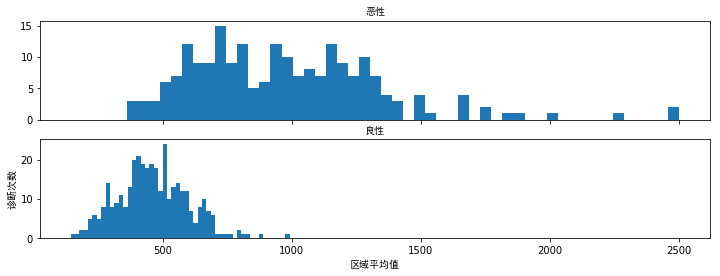

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(train_data.area_mean[train_data.diagnosis == "M"], bins = bins)
ax1.set_title('恶性',fontproperties=myfont)

ax2.hist(train_data.area_mean[train_data.diagnosis == "B"], bins = bins)
ax2.set_title('良性',fontproperties=myfont)

plt.xlabel('区域平均值',fontproperties=myfont)
plt.ylabel('诊断次数',fontproperties=myfont)
plt.show()

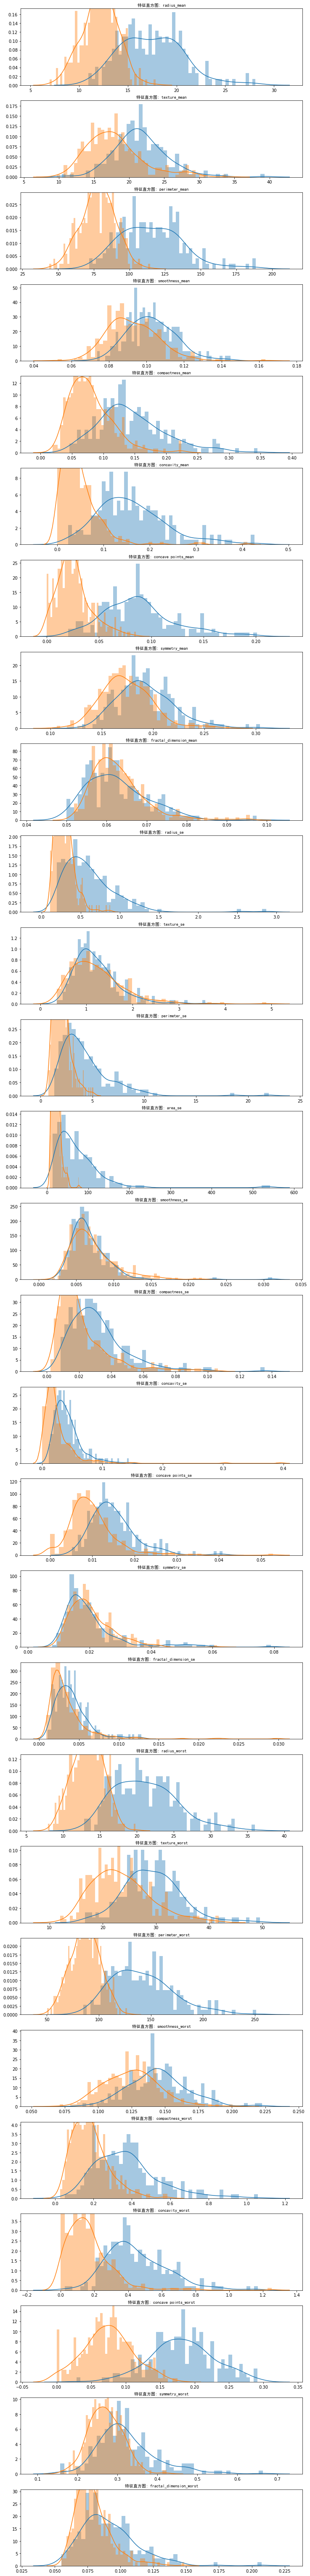

In [13]:
r_data = train_data.drop([idKey, areaMeanKey, areaWorstKey, diagnosisKey], axis=1)
r_features = r_data.columns
##可视化其他特征分布信息
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(r_data[r_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_data[cn][train_data.diagnosis == "M"], bins=50)
    sns.distplot(train_data[cn][train_data.diagnosis == "B"], bins=50)
    ax.set_xlabel('')
    ax.set_title('特征直方图: ' + str(cn),fontproperties=myfont)
plt.show()


In [13]:
train_data.loc[train_data.diagnosis == "M", 'diagnosis'] = 1
train_data.loc[train_data.diagnosis == "B", 'diagnosis'] = 0

In [14]:
train_data.loc[train_data.diagnosis == 0, 'benign'] = 1
train_data.loc[train_data.diagnosis == 1, 'benign'] = 0

In [15]:
train_data['benign'] = train_data.benign.astype(int)

In [16]:
train_data = train_data.rename(columns={'diagnosis': 'malignant'})

In [17]:
print(train_data.benign.value_counts())
print()
print(train_data.malignant.value_counts())


1    357
0    212
Name: benign, dtype: int64

0    357
1    212
Name: malignant, dtype: int64


In [18]:
pd.set_option("display.max_columns",101)
train_data.head()

,id,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
Malignant = train_data[train_data.malignant == 1]
Benign = train_data[train_data.benign == 1]

In [20]:
train_X = Malignant.sample(frac=0.8)
count_Malignants = len(train_X)

In [21]:
train_X = pd.concat([train_X, Benign.sample(frac = 0.8)], axis = 0)

In [22]:
test_X = train_data.loc[~train_data.index.isin(train_X.index)]

In [23]:
train_X = shuffle(train_X)
test_X = shuffle(test_X)

In [24]:
train_Y = train_X.malignant
train_Y = pd.concat([train_Y, train_X.benign], axis=1)

test_Y = test_X.malignant
test_Y = pd.concat([test_Y, test_X.benign], axis=1)

In [25]:
train_X = train_X.drop(['malignant','benign'], axis = 1)
test_X = test_X.drop(['malignant','benign'], axis = 1)

In [26]:
print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

456
456
113
113


In [27]:
features = train_X.columns.values

In [28]:
for feature in features:
    mean, std = train_data[feature].mean(), train_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

In [29]:
learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = []

In [30]:
input_nodes = train_X.shape[1]

In [31]:
num_labels = 2

In [32]:
split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]
input_X_test = test_X.as_matrix()[split:]
input_Y_test = test_Y.as_matrix()[split:]

In [33]:
def calculate_hidden_nodes(nodes):
    return (((2 * nodes)/3) + num_labels)

hidden_nodes1 = round(calculate_hidden_nodes(input_nodes))
hidden_nodes2 = round(calculate_hidden_nodes(hidden_nodes1))
hidden_nodes3 = round(calculate_hidden_nodes(hidden_nodes2))
print(input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3)


31 23 17 13


In [34]:
pkeep = tf.placeholder(tf.float32)

In [35]:
x = tf.placeholder(tf.float32, [None, input_nodes])

In [36]:
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)


In [37]:
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

In [38]:
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.relu(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

In [39]:
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)


In [40]:
y = y4
y_ = tf.placeholder(tf.float32, [None, num_labels])

In [41]:
cost = -tf.reduce_sum(y_ * tf.log(y))

In [42]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [43]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [44]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [45]:
init = tf.global_variables_initializer()

Epoch: 0 Acc = 0.88377 Cost = 289.40134 Valid_Acc = 0.87500 Valid_Cost =  34.75459
Epoch: 1 Acc = 0.92325 Cost = 256.07205 Valid_Acc = 0.91071 Valid_Cost =  30.01871
Epoch: 2 Acc = 0.93202 Cost = 217.39485 Valid_Acc = 0.92857 Valid_Cost =  25.10780
Epoch: 3 Acc = 0.95175 Cost = 180.33913 Valid_Acc = 0.96429 Valid_Cost =  20.45712
Epoch: 4 Acc = 0.96272 Cost = 140.55374 Valid_Acc = 1.00000 Valid_Cost =  15.25423
Optimization Finished!


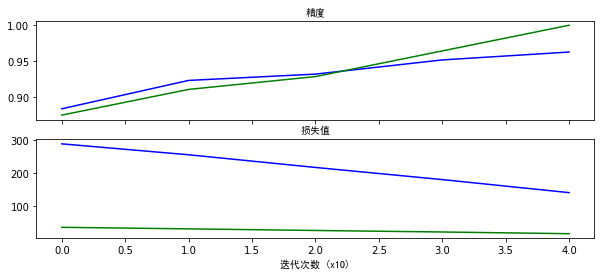

In [46]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = input_X[batch * batch_size : (1 + batch) * batch_size]
            batch_y = input_Y[batch * batch_size : (1 + batch) * batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # 循环10次打印日志信息
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: input_X, y_: input_Y, pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: input_X_valid, y_: input_Y_valid, pkeep: 1})

            print ("Epoch:", epoch, "Acc =", "{:.5f}".format(train_accuracy), "Cost =", "{:.5f}".format(newCost), "Valid_Acc =", "{:.5f}".format(valid_accuracy), "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # 记录模型结果
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print("Optimization Finished!")
    
    # 可视化精度及损失值
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

    ax1.plot(accuracy_history, color='b') 
    ax1.plot(valid_accuracy_history, color='g') 
    ax1.set_title('精度',fontproperties=myfont)

    ax2.plot(cost_history, color='b')
    ax2.plot(valid_cost_history, color='g')
    ax2.set_title('损失值',fontproperties=myfont)

    plt.xlabel('迭代次数 (x10)',fontproperties=myfont)
    plt.show()


In [47]:
sess.close()